<a href="https://colab.research.google.com/github/RajniHarsha27/Traffic-Clickrate-Distribution-Analysis/blob/main/Traffic_Clickrate_Distribution_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1L_EPcCot4-WsdloY9Px509ytkpZdSRfH/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1L_EPcCot4-WsdloY9Px509ytkpZdSRfH
From (redirected): https://drive.google.com/uc?id=1L_EPcCot4-WsdloY9Px509ytkpZdSRfH&confirm=t&uuid=6f5ef61f-da80-4511-88aa-59c257e4dd65
To: /content/traffic.csv
100% 30.6M/30.6M [00:00<00:00, 58.0MB/s]


The dataset includes the following columns:

1. event: The type of event (e.g., 'click', 'pageview').
2. date: The date of the event.
3. country: The country of origin of the event.
4. city: The city of origin of the event.
5. artist: The artist associated with the link.
6. album: The album associated with the link.
7. track: The track associated with the link.
8. isrc: ISRC code (unique identifier for a song).
9. linkid: The unique ID of the link.


**Problem Statement**
> The goal of this project is to understand this traffic better, in particular the volume and distribution of events, and to develop ideas how to increase the links' clickrates.



In [ ]:
traffic_data = pd.read_csv("traffic.csv")


In [ ]:
traffic_data.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [ ]:

traffic_data['date'] = pd.to_datetime(traffic_data['date'])


In [ ]:
# looking for null values

traffic_data.isnull().sum()

traffic_data = traffic_data.dropna


In [ ]:
traffic_data.isnull().sum()


,0
event,0
date,0
country,11
city,11
artist,37
album,5
track,5
isrc,7121
linkid,0


In [ ]:
traffic_data.shape

(219149, 9)

In [ ]:
# Filter the dataset for pageview events and group by date to calculate total and per day
pageview_data = traffic_data[traffic_data['event'] == 'pageview']

# Total number of pageview events
total_pageviews = pageview_data.shape[0]

# Number of pageview events per day
pageviews_per_day = pageview_data.groupby('date').size()

# Display the results
total_pageviews, pageviews_per_day

(142015,
 date
 2021-08-19    22366
 2021-08-20    21382
 2021-08-21    21349
 2021-08-22    20430
 2021-08-23    18646
 2021-08-24    18693
 2021-08-25    19149
 dtype: int64)

Total pageview events and distribution per day:
Total pageview events: 142,015
Pageview events per day:
* 2021-08-19: 22,366
* 2021-08-20: 21,382
* 2021-08-21: 21,349
* 2021-08-22: 20,430
* 2021-08-23: 18,646
* 2021-08-24: 18,693
* 2021-08-25: 19,149

In [ ]:
# Get the count of each event type (clicks, pageviews, etc.)
event_counts = traffic_data.groupby('event').size()

# Display the counts of all recorded events
event_counts

,0
event,
click,55732
pageview,142015
preview,28531


In [ ]:
#  What about the other recorded events? per day

# Group by date and event type to get the count of each event type per day
event_counts_per_day = traffic_data.groupby(['event','date']).size()

# Display the counts of all recorded events per day
print(event_counts_per_day)


event     date      
click     2021-08-19     9207
          2021-08-20     8508
          2021-08-21     8071
          2021-08-22     7854
          2021-08-23     7315
          2021-08-24     7301
          2021-08-25     7476
pageview  2021-08-19    22366
          2021-08-20    21382
          2021-08-21    21349
          2021-08-22    20430
          2021-08-23    18646
          2021-08-24    18693
          2021-08-25    19149
preview   2021-08-19     3788
          2021-08-20     4222
          2021-08-21     4663
          2021-08-22     4349
          2021-08-23     3847
          2021-08-24     3840
          2021-08-25     3822
dtype: int64


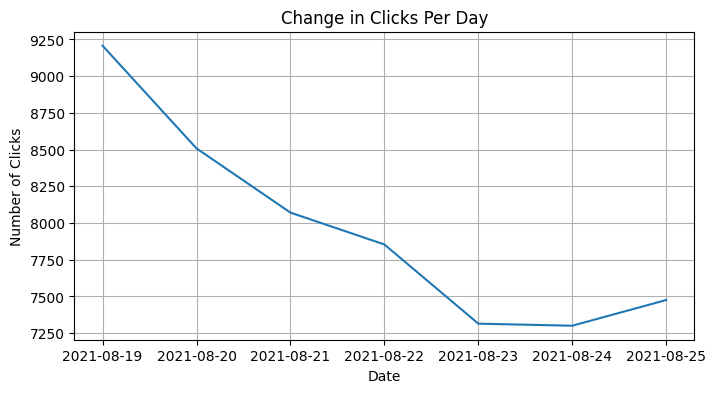

In [ ]:
# line graph of change in click per day


click_data = traffic_data[traffic_data['event'] == 'click']

# Group by date and count the number of clicks per day
clicks_per_day = click_data.groupby('date').size()

# Create a line graph of the change in clicks per day
plt.figure(figsize=(8, 4))
plt.plot(clicks_per_day.index, clicks_per_day.values)
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.title('Change in Clicks Per Day')
plt.grid(True)
plt.show()


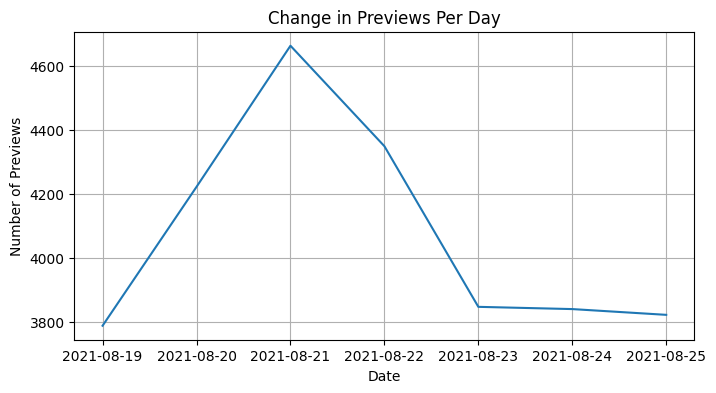

In [ ]:
# line graph of change in preview per day

import matplotlib.pyplot as plt
# Filter for preview events
preview_data = traffic_data[traffic_data['event'] == 'preview']

# Group by date and count the number of previews per day
previews_per_day = preview_data.groupby('date').size()

# Create a line graph of the change in previews per day
plt.figure(figsize=(8, 4))
plt.plot(previews_per_day.index, previews_per_day.values)
plt.xlabel('Date')
plt.ylabel('Number of Previews')
plt.title('Change in Previews Per Day')
plt.grid(True)
plt.show()


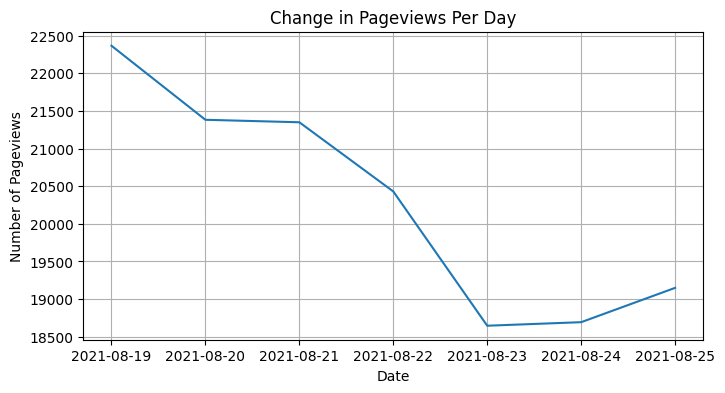

In [ ]:
# line graph of change in page view per day

pageviews_per_day = pageview_data.groupby('date').size()

# Create a line graph of the change in pageviews per day
plt.figure(figsize=(8, 4))
plt.plot(pageviews_per_day.index, pageviews_per_day.values)
plt.xlabel('Date')
plt.ylabel('Number of Pageviews')
plt.title('Change in Pageviews Per Day')
plt.grid(True)
plt.show()


* Declining Clicks Over Time: The number of clicks gradually decreases from 9,
     207 on 2021-08-19 to 7,476 on 2021-08-25, showing a decline of about 19%.

* Pageviews similar to Click Trends: Pageviews follow a similar downward trend, from 22,366 on 2021-08-19 to 19,149 on 2021-08-25. This suggests that the overall traffic to the links is also decreasing, not just clicks.
*  Previews peak on 2021-08-21 with 4,663 previews, which is followed by a gradual decline to 3,822 on 2021-08-25.
* By examining specific dates related to marketing campaigns or content updates, we can link these events to variations in clicks and refine our strategies.

# **country wise analysis**

In [ ]:
# Filter the dataset for pageview events
pageview_data = traffic_data[traffic_data['event'] == 'pageview']

# Get unique countries for pageview events
countries_for_pageviews = pageview_data['country'].unique()

# Display the unique countries
print(countries_for_pageviews)

['Saudi Arabia' 'United States' 'Ireland' 'United Kingdom' 'France'
 'Guatemala' 'Jordan' 'Kuwait' 'Pakistan' 'Italy' 'Germany' 'Iraq' 'Peru'
 'India' 'Nicaragua' 'Rwanda' 'Tanzania' 'United Arab Emirates' 'Norway'
 'Oman' 'Bahamas' 'Algeria' 'Czechia' 'Mexico' 'Jamaica' 'Netherlands'
 'Colombia' 'Morocco' 'Australia' 'Myanmar' 'Uzbekistan' 'Austria'
 'Latvia' 'Turkey' 'Mauritania' 'Sri Lanka' 'Bosnia and Herzegovina'
 'Estonia' 'Nigeria' 'Bulgaria' 'Greece' 'El Salvador' 'Philippines'
 'Denmark' 'Serbia' 'Canada' 'Spain' 'Libya' 'Palestine' 'Chad' 'Ecuador'
 'Mali' 'Romania' 'Switzerland' 'Portugal' 'Slovenia' 'Iceland' 'Sweden'
 'Bahrain' 'Egypt' 'Lithuania' 'Liberia' 'Israel' 'Ukraine' 'Puerto Rico'
 'South Africa' 'Ghana' 'Kenya' 'Armenia' 'Nepal' 'Barbados' 'Azerbaijan'
 'Qatar' 'Uganda' 'Poland' 'Brazil' 'Guyana' 'Fiji' 'Bangladesh' 'Belgium'
 'Hong Kong' 'Haiti' 'Botswana' 'Ivory Coast' 'Bhutan' 'Indonesia'
 'Réunion' 'Cameroon' 'Singapore' 'Yemen' 'French Guiana' 'Slovakia'
 'D

In [ ]:
#  pageview_data number of clicks from each country

# Group by country and count the number of pageviews for each country
pageviews_per_country = pageview_data.groupby('country').size()

# Display the number of pageviews from each country
print(pageviews_per_country)

# Group by country and count the number of clicks for each country
clicks_per_country = click_data.groupby('country').size()

# Display the number of clicks from each country
print(clicks_per_country)


country
Afghanistan            2
Albania              344
Algeria              443
American Samoa         3
Andorra                2
                    ... 
Wallis and Futuna      1
Yemen                 49
Zambia                68
Zimbabwe              18
Åland                  4
Length: 211, dtype: int64
country
Albania               76
Algeria              129
American Samoa         1
Angola                36
Anguilla               2
                    ... 
Wallis and Futuna      1
Yemen                 16
Zambia                38
Zimbabwe               5
Åland                  1
Length: 202, dtype: int64


In [ ]:
#  country with highest click

# Group by country and count the number of clicks for each country
clicks_per_country = click_data.groupby('country').size()

# Sort the countries by the number of clicks in descending order and get the top 6
countries_by_clicks = clicks_per_country.sort_values(ascending=False)

# Display with the clicks in decreasing order
print('countrie with their click')
print(countries_by_clicks)


countrie with their click
country
India                       11609
United States                9533
Saudi Arabia                 9495
France                       4054
Iraq                         1836
                            ...  
Solomon Islands                 1
Central African Republic        1
Tajikistan                      1
Dominica                        1
Åland                           1
Length: 202, dtype: int64


In [ ]:
import plotly.express as px

# Prepare a DataFrame that has country, pageviews, and clicks
country_data = pd.DataFrame({
    'country': pageviews_per_country.index,
    'pageviews': pageviews_per_country.values,
    'clicks': clicks_per_country.reindex(pageviews_per_country.index, fill_value=0).values  # Ensure consistent indexing
})

# Plot for Pageviews
fig_pageviews = px.choropleth(country_data,
                              locations="country",
                              locationmode="country names",
                              color="pageviews",
                              hover_name="country",
                              color_continuous_scale="Oranges",
                              title="Pageviews Distribution by Country")

# Show the Pageviews Map
fig_pageviews.show()

# Plot for Clicks
fig_clicks = px.choropleth(country_data,
                           locations="country",
                           locationmode="country names",
                           color="clicks",
                           hover_name="country",
                           color_continuous_scale="Blues",
                           title="Clicks Distribution by Country")

# Show the Clicks Map
fig_clicks.show()


# calculating click rate




In [ ]:
# Filter the dataset for pageview and click events
pageview_data = traffic_data[traffic_data['event'] == 'pageview']
click_data = traffic_data[traffic_data['event'] == 'click']

# Calculate total pageviews and clicks
total_pageviews = pageview_data.shape[0]
total_clicks = click_data.shape[0]

# Calculate the overall click rate
click_rate = total_clicks / total_pageviews

# Display the click rate
print(f"Overall Click Rate: {click_rate:.2%}")

Overall Click Rate: 39.24%


In [ ]:

#  the click rate for each  countries
click_rates = {}
for country in countries_by_clicks.index:
  total_events_country = traffic_data[traffic_data['country'] == country].shape[0]
  total_clicks_country = click_data[click_data['country'] == country].shape[0]
  if total_events_country > 0:
    click_rate = (total_clicks_country / total_events_country) * 100
    click_rates[country] = click_rate
  else:
    click_rates[country] = 0  # Or handle the case where there are no events for a country


# Display the click rate for each  countries
print("Click Rates Countries with highest click:")
for country, rate in click_rates.items():
    print(f"{country}: {rate:.2f}%")


Click Rates Countries with highest click:
India: 27.00%
United States: 29.28%
Saudi Arabia: 20.06%
France: 25.89%
Iraq: 22.23%
Pakistan: 29.29%
United Kingdom: 25.41%
Germany: 25.55%
Canada: 29.72%
United Arab Emirates: 20.69%
Kuwait: 23.35%
Turkey: 18.61%
Australia: 28.52%
Nigeria: 28.48%
Netherlands: 29.28%
Oman: 18.40%
Bangladesh: 26.54%
Ghana: 29.48%
Belgium: 24.05%
Sweden: 22.62%
Norway: 20.08%
Poland: 27.57%
Brazil: 26.60%
Austria: 28.66%
Morocco: 23.33%
Italy: 28.41%
Mexico: 19.91%
South Africa: 28.94%
Switzerland: 24.08%
Bahrain: 21.80%
Qatar: 20.29%
Nepal: 24.17%
Denmark: 22.51%
Romania: 19.86%
Jordan: 14.09%
Ireland: 26.21%
Spain: 22.00%
Philippines: 21.76%
Kenya: 26.34%
Egypt: 19.51%
Algeria: 19.08%
Finland: 23.31%
Mauritania: 31.30%
Colombia: 19.81%
Russia: 20.60%
Israel: 18.66%
Libya: 18.48%
Somalia: 36.61%
New Zealand: 24.40%
Tanzania: 26.45%
Senegal: 32.95%
Croatia: 26.47%
Palestine: 16.67%
Albania: 15.54%
Jamaica: 26.94%
Ivory Coast: 30.00%
Greece: 22.19%
Hungary: 30.13

In [ ]:
# Group the data by 'link' and calculate the number of clicks and pageviews for each link
clicks_per_link = traffic_data[traffic_data['event'] == 'click'].groupby('linkid').size()
pageviews_per_link = traffic_data[traffic_data['event'] == 'pageview'].groupby('linkid').size()

# Create a DataFrame to hold the results
clickrate_per_link = pd.DataFrame({
    'total_clicks': clicks_per_link,
    'total_pageviews': pageviews_per_link
})

# Calculate the click rate for each link
clickrate_per_link['click_rate'] = clickrate_per_link['total_clicks'] / clickrate_per_link['total_pageviews']

# Fill missing values with 0 for links that may not have clicks or pageviews
clickrate_per_link = clickrate_per_link.fillna(0)



In [ ]:
clickrate_per_link

,total_clicks,total_pageviews,click_rate
linkid,,,
00073307-ae96-5089-a117-4783afb42f8e,0.0,2.0,0.0
00126b32-0c35-507b-981c-02c80d2aa8e7,2.0,2.0,1.0
0018cfff-50a1-5984-9715-01ef2d11a49a,0.0,1.0,0.0
0033934b-5d16-5a06-af58-d087bcdd3680,0.0,1.0,0.0
0034d6cf-3bd8-5ffe-aafc-b3959fc48608,0.0,1.0,0.0
...,...,...,...
fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1.0,1.0,1.0
fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7,0.0,2.0,0.0
fff84c0e-90a1-59d8-9997-adc909d50e16,1.0,1.0,1.0



**insights: Top Countries for Pageviews AND CLICK RATE :**

    Saudi Arabia: 28,873 pageviews
    India: 27,286 pageviews
    United States: 20,839 pageviews
    France: 9,674 pageviews
    Iraq: 4,897 pageviews
    
    Overall Click Rate: The overall click rate (clicks divided by pageviews) is approximately 39.24%.

    the countries with the highest total clicks do not necessarily have the highest click rates. This indicates a difference between volume of traffic and user engagement.**








In [ ]:


# Sort the DataFrame by click rate in descending order and get the top 5 links
top_5_links = clickrate_per_link.sort_values('click_rate', ascending=False).head(5)

# Display the top 5 links with their click rates
top_5_links


,total_clicks,total_pageviews,click_rate
linkid,,,
c95f1fc1-fab0-4c74-b3f5-52bd3684a713,923.0,10.0,92.3
27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7,3.0,1.0,3.0
330773a6-f22a-5c7a-a3e4-7809fe8539b9,3.0,1.0,3.0
3d0e78ec-d580-49a0-ae97-2e11992c411a,2.0,1.0,2.0
54744c7e-ea2a-5376-876a-439d24775153,2.0,1.0,2.0


**Correlation Between Pageviews and Clicks and p value**
  * **alpha=0.05**




In [ ]:
from scipy.stats import pearsonr

# Extract clicks and pageviews for each link
clicks_per_link = traffic_data[traffic_data['event'] == 'click'].groupby('linkid').size()
pageviews_per_link = traffic_data[traffic_data['event'] == 'pageview'].groupby('linkid').size()

# Merge the clicks and pageviews into one dataframe
link_data = pd.DataFrame({
    'clicks': clicks_per_link,
    'pageviews': pageviews_per_link
}).fillna(0)  # Fill NaN values with 0 for links with no clicks or pageviews

# Calculate the Pearson correlation coefficient and the p-value
corr, p_value = pearsonr(link_data['pageviews'], link_data['clicks'])

# Display the results
print(f"Pearson correlation: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation: 0.9940
P-value: 0.0000


Insights:
* As Pearson's correlation is closer to 1 and a p-value is closer to 0, it suggest a strong, significant linear correlation between clicks and pageviews.


**SUGGESTION:**

* To boost click rates in countries with high traffic (e.g., India, the U.S.), consider implementing audience segmentation and personalized marketing
* Conduct a deeper analysis of user behavior in high-traffic countries. Understanding why users visit but don't click.
* Investigate why engagement spikes and again drops over time.
* It may be that users eventually lose interest. Implement focused strategies, such as reminders for reengagement with returning users once traffic begins to decline.


